In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [86]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Pre Processing Data

In [87]:
print('\nNull Values in Training \n{}'.format(train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test.isnull().sum()))

print('\nDuplicated values in train {}'.format(train.duplicated().sum()))
print('Duplicated values in test {}'.format(test.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


filling 
-> Embarked with most common port of embark.
-> Fare with the average value of fares.

In [88]:
print('Embarkation per ports \n{}'.format(train['Embarked'].value_counts()))

Embarkation per ports 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [89]:
train['Embarked'].fillna(value='S', inplace=True)
test['Fare'].fillna(value=test.Fare.mean(), inplace=True)

filling 
-> Age according to the title, and take the age average of each one (Miss, Mrs, Mr, Master, Dr, Ms)

In [90]:
mean_age_miss = train[train["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = train[train["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = train[train["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = train[train["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


In [91]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

In [92]:
train['Age'] = train[['Name', 'Age']].apply(fill_age,axis=1)
test['Age'] = test[['Name', 'Age']].apply(fill_age,axis=1)

filling 
-> Cabin First with Variable 'X'
-> then fill better according to Fare value

In [93]:
train['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in train['Cabin']])
test['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in test['Cabin']])

In [94]:
print('Mean Fare of Cabin B {}'.format(round(train[train['Cabin']=='B']['Fare'].mean(), 2)))
print('Mean Fare of Cabin C {}'.format(round(train[train['Cabin']=='C']['Fare'].mean(), 2)))
print('Mean Fare of Cabin D {}'.format(round(train[train['Cabin']=='D']['Fare'].mean(), 2)))
print('Mean Fare of Cabin E {}'.format(round(train[train['Cabin']=='E']['Fare'].mean(), 2)))
print('Mean Fare of Cabin A {}'.format(round(train[train['Cabin']=='A']['Fare'].mean(), 2)))
print('Mean Fare of Cabin T {}'.format(round(train[train['Cabin']=='T']['Fare'].mean(), 2)))
print('Mean Fare of Cabin X {}'.format(round(train[train['Cabin']=='X']['Fare'].mean(), 2)))
print('Mean Fare of Cabin F {}'.format(round(train[train['Cabin']=='F']['Fare'].mean(), 2)))
print('Mean Fare of Cabin G {}'.format(round(train[train['Cabin']=='G']['Fare'].mean(), 2)))

Mean Fare of Cabin B 113.51
Mean Fare of Cabin C 100.15
Mean Fare of Cabin D 57.24
Mean Fare of Cabin E 46.03
Mean Fare of Cabin A 39.62
Mean Fare of Cabin T 35.5
Mean Fare of Cabin X 19.16
Mean Fare of Cabin F 18.7
Mean Fare of Cabin G 13.58


In [142]:
def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'E'
        if ((fare < 46) and (fare > 39)):
            return 'A'            
        else:
            return 'X'
    else:
        return cabin

In [96]:
train['Cabin'] = train[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
test['Cabin'] = test[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

evaluate Pre Processing

In [97]:
print('\nNull Values in Training \n{}'.format(train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test.isnull().sum()))

print('\nDuplicated values in train {}'.format(train.duplicated().sum()))
print('Duplicated values in test {}'.format(test.duplicated().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Null Values in Testing 
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


In [99]:
categories = {"female": 1, "male": 0}
train['Sex']= train['Sex'].map(categories)
test['Sex']= test['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
train['Embarked']= train['Embarked'].map(categories)
test['Embarked']= test['Embarked'].map(categories)

categories = train.Cabin.unique()
train['Cabin'] = train.Cabin.astype("category").cat.codes
test['Cabin'] = test.Cabin.astype("category").cat.codes

train['Ticket'] = train['Ticket'].astype('category')
train['Ticket'] = train['Ticket'].cat.codes
test['Ticket'] = test['Ticket'].astype('category')
test['Ticket'] = test['Ticket'].cat.codes

train['Name'] = train['Name'].astype('category')
train['Name'] = train['Name'].cat.codes
train['test'] = train['test'].astype('category')
train['test'] = train['test'].cat.codes

In [129]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

train['Alone'] = train[['SibSp','Parch']].apply(create_alone_feature, axis=1)
train['Familiars'] = train['SibSp'] + train['Parch']

test['Alone'] = test[['SibSp','Parch']].apply(create_alone_feature, axis=1)
test['Familiars'] = test['SibSp'] + test['Parch']

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x = train.loc[:891,['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Alone', 'Familiars']]
y = train.loc[:891, 'Survived']
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=)

# #Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

(712, 13) (179, 13)
(712,) (179,)


RandomForestClassifier(n_estimators=10)

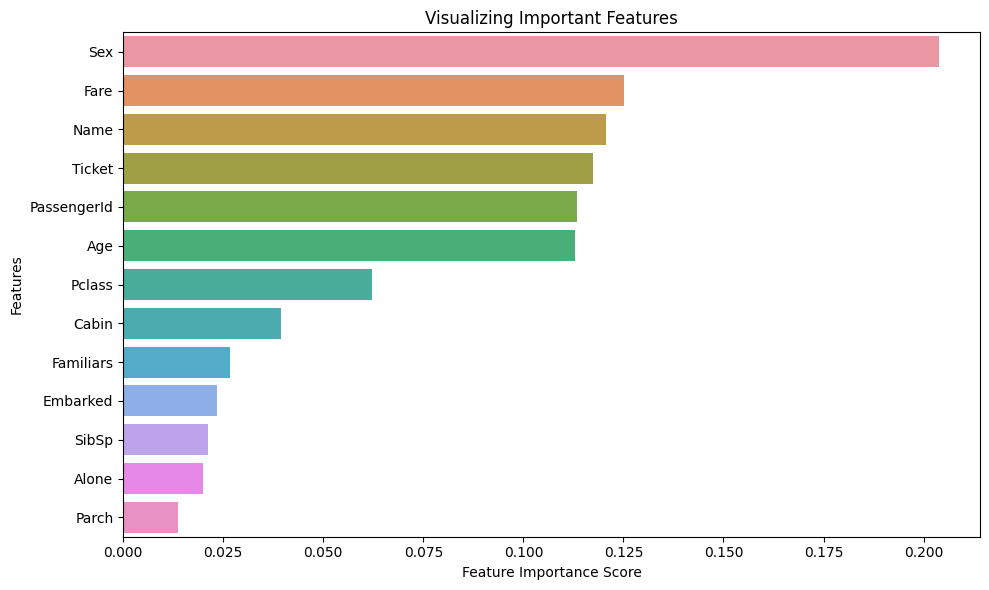

In [136]:
feature_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()